<a href="https://colab.research.google.com/github/shashubh/bits_aiml_python_pub/blob/main/CapstoneMyVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bigData = '/content/drive/MyDrive/CapstoneProjectFiles/train_timeseries.csv'
soilData = '/content/drive/MyDrive/CapstoneProjectFiles/soil_data.csv'

In [ ]:
bdf = pd.read_csv(bigData)
sdf = pd.read_csv(soilData)

In [ ]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

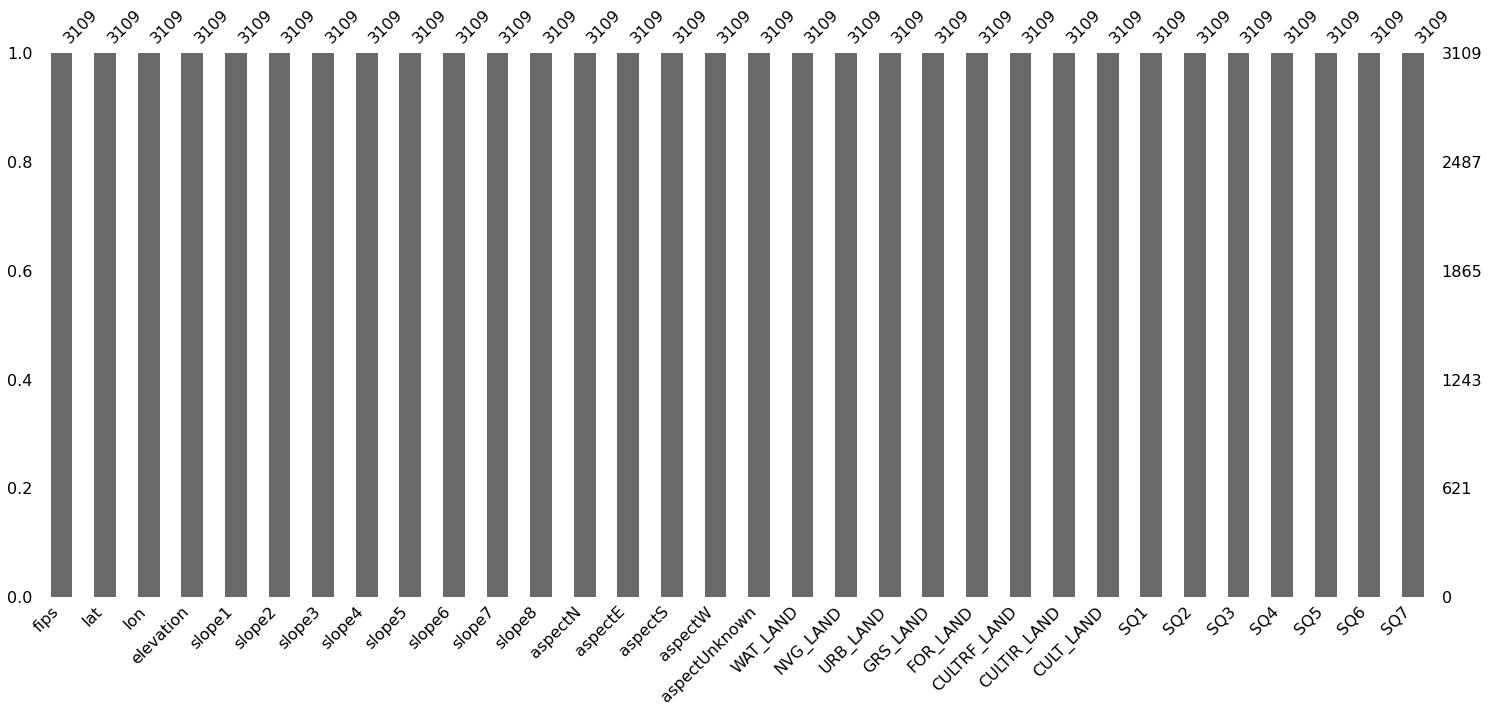

In [ ]:
msno.bar(sdf)

In [ ]:
print('Before: ',sdf.shape)
sdf = sdf.drop_duplicates()
print('After: ',sdf.shape)

Before:  (3109, 32)
After:  (3109, 32)


In [ ]:
sdfCorr = sdf.corr()

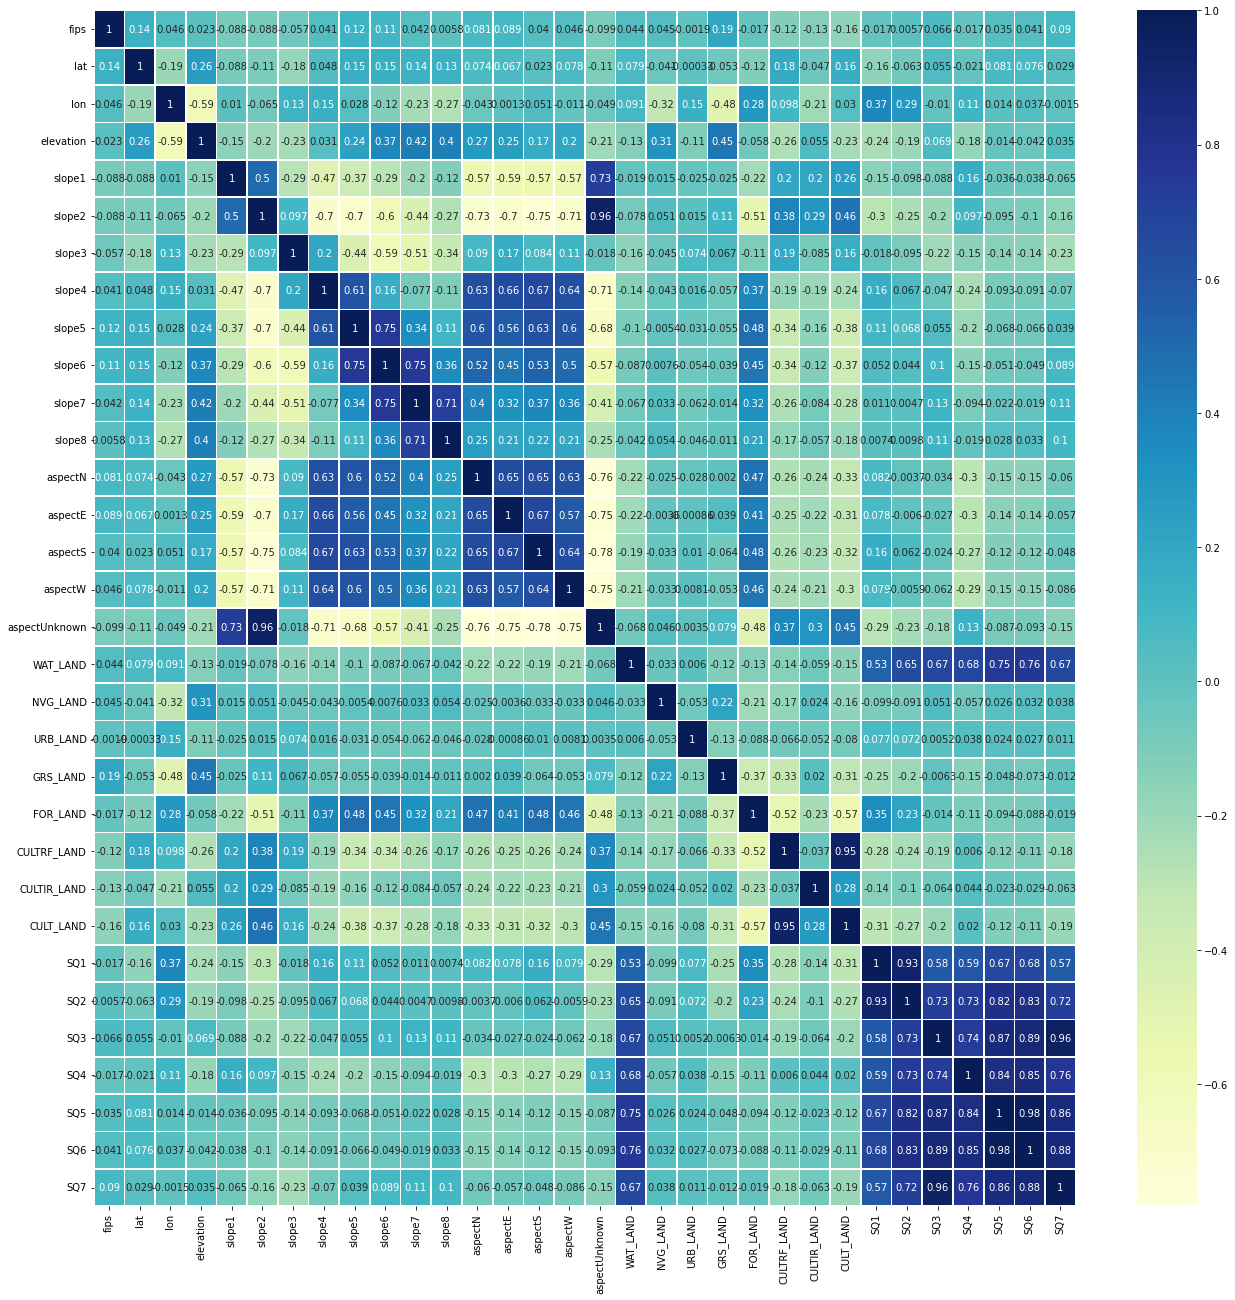

In [ ]:
fig, ax = plt.subplots(figsize=(22,22))  
sns.heatmap(sdfCorr, cmap="YlGnBu", annot=True, linewidth = 0.7, ax = ax)

In [ ]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
bdf.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


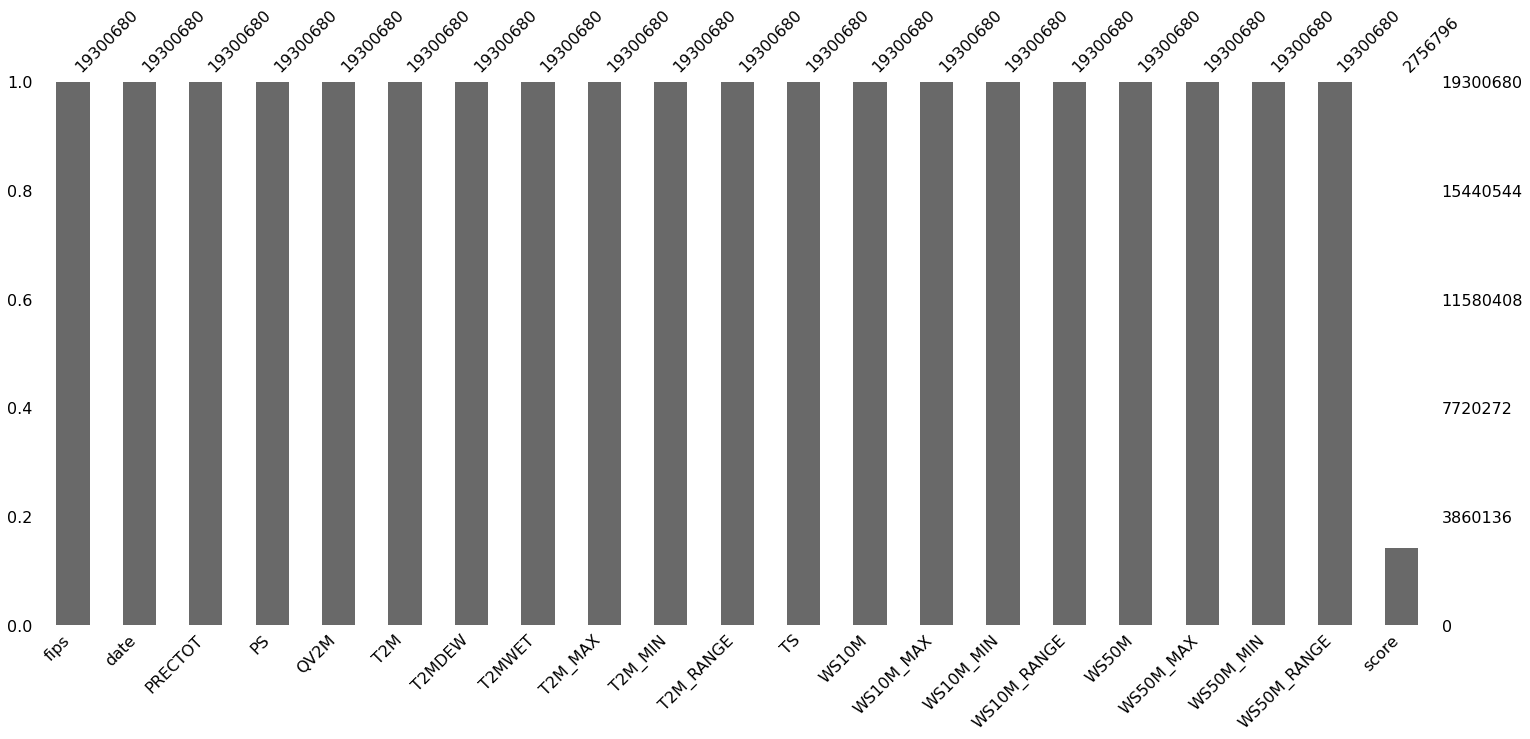

In [ ]:
msno.bar(bdf)

In [ ]:
bdf['score'] = bdf['score'].replace(np.nan, 5)

In [ ]:
bdf['score'].value_counts()

5.0000    16565690
0.0000     1480827
1.0000      219135
2.0000      123789
3.0000       82801
            ...   
0.1145           1
2.0172           1
0.6750           1
1.3998           1
0.6060           1
Name: score, Length: 55395, dtype: int64

In [ ]:
print('Before: ',bdf.shape)
bdf = bdf.drop_duplicates()
print('After: ',bdf.shape)

Before:  (19300680, 21)
After:  (19300680, 21)


In [ ]:
bdf['date'] = pd.to_datetime(bdf['date'])

In [ ]:
bdf.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,5.0
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,5.0
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,5.0
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,5.0
5,1001,2000-01-06,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,...,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,5.0
6,1001,2000-01-07,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,...,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,5.0
7,1001,2000-01-08,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,...,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,5.0
8,1001,2000-01-09,16.19,99.88,11.18,15.73,15.45,15.45,19.60,10.30,...,15.65,3.03,3.98,2.25,1.73,5.97,7.44,4.95,2.49,5.0
9,1001,2000-01-10,21.23,99.78,7.77,13.61,9.59,9.60,17.65,7.73,...,13.42,3.10,5.60,1.72,3.88,6.33,10.03,4.15,5.88,5.0


In [ ]:
bdf['year'] = bdf['date'].dt.year

In [ ]:
bdf['score'] = np.floor(bdf['score'])

In [ ]:
bdf['score'].value_counts()

5.0    16565690
0.0     1794623
1.0      424353
2.0      265995
3.0      169049
4.0       80970
Name: score, dtype: int64

In [ ]:
bdf['year'].value_counts()

2000    1137528
2004    1137528
2012    1137528
2008    1137528
2016    1137528
2003    1134420
2005    1134420
2006    1134420
2007    1134420
2001    1134420
2009    1134420
2010    1134420
2011    1134420
2002    1134420
2013    1134420
2014    1134420
2015    1134420
Name: year, dtype: int64

In [ ]:
bdf['fips'].value_counts()

1001     6210
39159    6210
39115    6210
39117    6210
39119    6210
         ... 
21159    6210
21161    6210
21163    6210
21165    6210
56043    6210
Name: fips, Length: 3108, dtype: int64

In [ ]:
countdfs = []
for year in [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]:
  for score in (0,1,2,3,4,5):
    count = bdf[(bdf['year'] == year) & (bdf['score'] == score)].shape[0]
    countdf = []
    countdf.append(year)
    countdf.append(score)
    countdf.append(count)
    countdfs.append(countdf)

In [ ]:
countdf = pd.DataFrame(countdfs, columns = ['Year','Score','Count'])

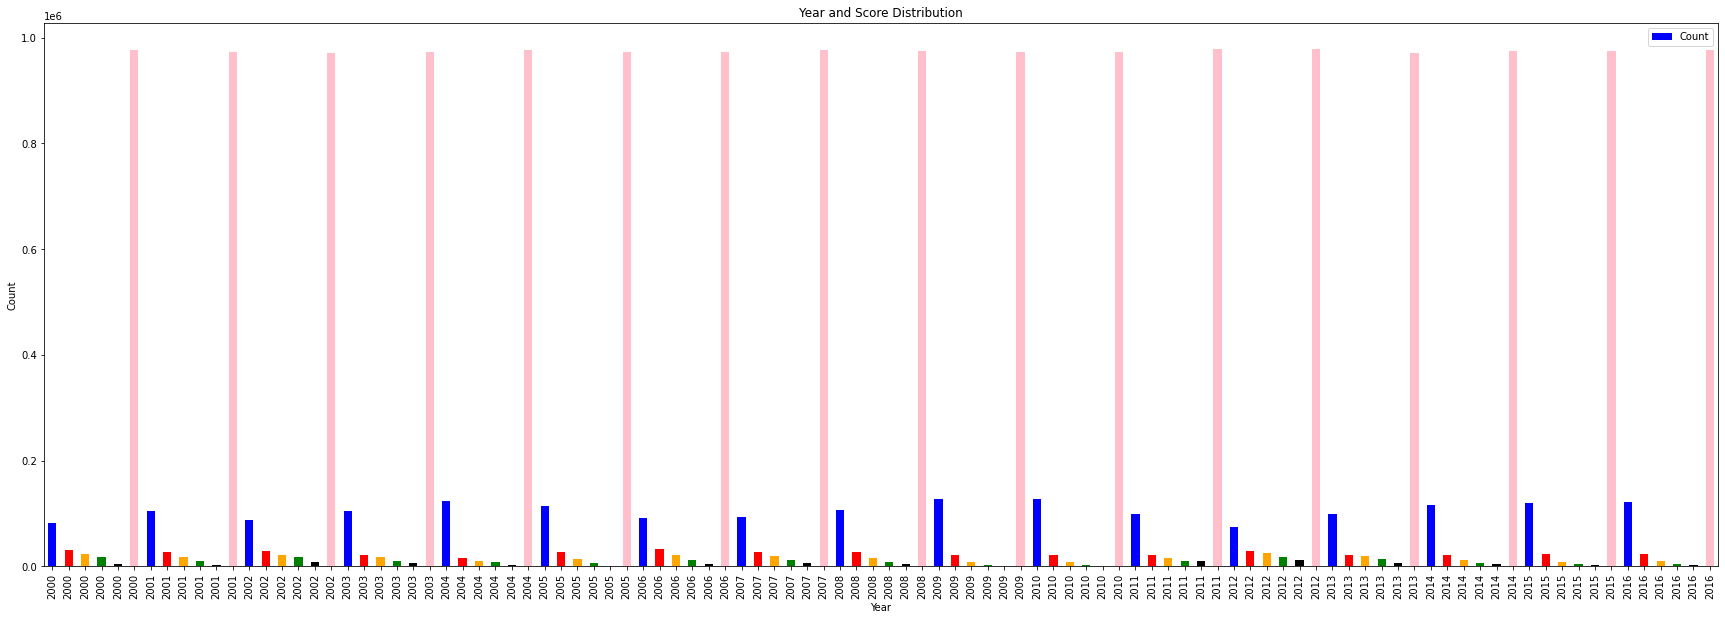

In [ ]:
countdf.plot(kind='bar',
             xlabel = 'Year', x = 'Year', 
             ylabel = 'Count', y = 'Count', 
             title = 'Year and Score Distribution', 
             figsize=(30,10), 
             color=['blue', 'red', 'orange','green', 'black', 'pink']
            )

In [ ]:
bdfCorr = bdf.corr()

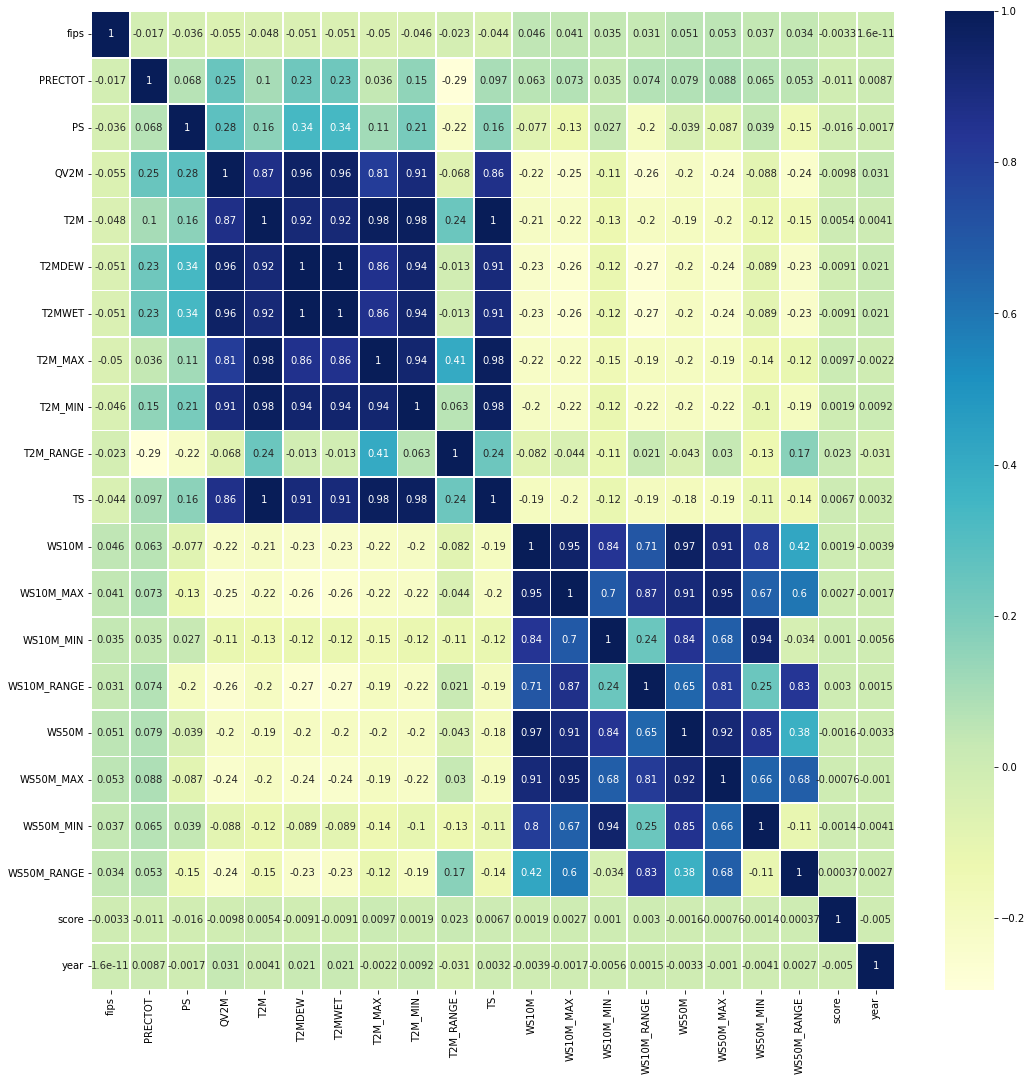

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))  
sns.heatmap(bdfCorr, cmap="YlGnBu", annot=True, linewidth = 0.7, ax = ax)

In [ ]:
fdf = pd.merge(sdf, bdf, on=['fips'])

In [ ]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19300680 entries, 0 to 19300679
Data columns (total 53 columns):
 #   Column         Dtype         
---  ------         -----         
 0   fips           int64         
 1   lat            float64       
 2   lon            float64       
 3   elevation      int64         
 4   slope1         float64       
 5   slope2         float64       
 6   slope3         float64       
 7   slope4         float64       
 8   slope5         float64       
 9   slope6         float64       
 10  slope7         float64       
 11  slope8         float64       
 12  aspectN        float64       
 13  aspectE        float64       
 14  aspectS        float64       
 15  aspectW        float64       
 16  aspectUnknown  float64       
 17  WAT_LAND       float64       
 18  NVG_LAND       float64       
 19  URB_LAND       float64       
 20  GRS_LAND       float64       
 21  FOR_LAND       float64       
 22  CULTRF_LAND    float64       
 23  CULTI

In [ ]:
fdf.describe()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,...,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07
mean,3.067038e+04,3.827826e+01,-9.165564e+01,4.273517e+02,5.498610e-02,2.977828e-01,3.198956e-01,1.558736e-01,5.342471e-02,6.534376e-02,...,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,4.384085e+00,2.008000e+03
std,1.497911e+04,4.837603e+00,1.148296e+01,4.999273e+02,8.986988e-02,2.159424e-01,1.676431e-01,1.283995e-01,7.310132e-02,1.255203e-01,...,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.568520e+00,4.899637e+00
min,1.001000e+03,2.560104e+01,-1.242114e+02,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00,2.000000e+03
25%,1.904450e+04,3.468499e+01,-9.803500e+01,1.320000e+02,8.300000e-03,1.048500e-01,1.857750e-01,4.072500e-02,5.000000e-04,0.000000e+00,...,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,5.000000e+00,2.004000e+03
50%,2.921200e+04,3.832501e+01,-9.018012e+01,2.715000e+02,2.835000e-02,2.717000e-01,3.469500e-01,1.275000e-01,1.220000e-02,7.000000e-04,...,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,5.000000e+00,2.008000e+03
75%,4.600750e+04,4.169234e+01,-8.337292e+01,4.815000e+02,6.852500e-02,4.775500e-01,4.593000e-01,2.552250e-01,9.032500e-02,5.435000e-02,...,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,5.000000e+00,2.012000e+03
max,5.604300e+04,4.884265e+01,-6.760935e+01,3.561000e+03,9.740000e-01,7.599000e-01,6.969000e-01,5.717000e-01,3.300000e-01,6.068000e-01,...,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00,2.016000e+03


In [ ]:
fdf['score'].value_counts()

5.0    16565690
0.0     1794623
1.0      424353
2.0      265995
3.0      169049
4.0       80970
Name: score, dtype: int64

In [ ]:
fdf_corr = fdf.corr()

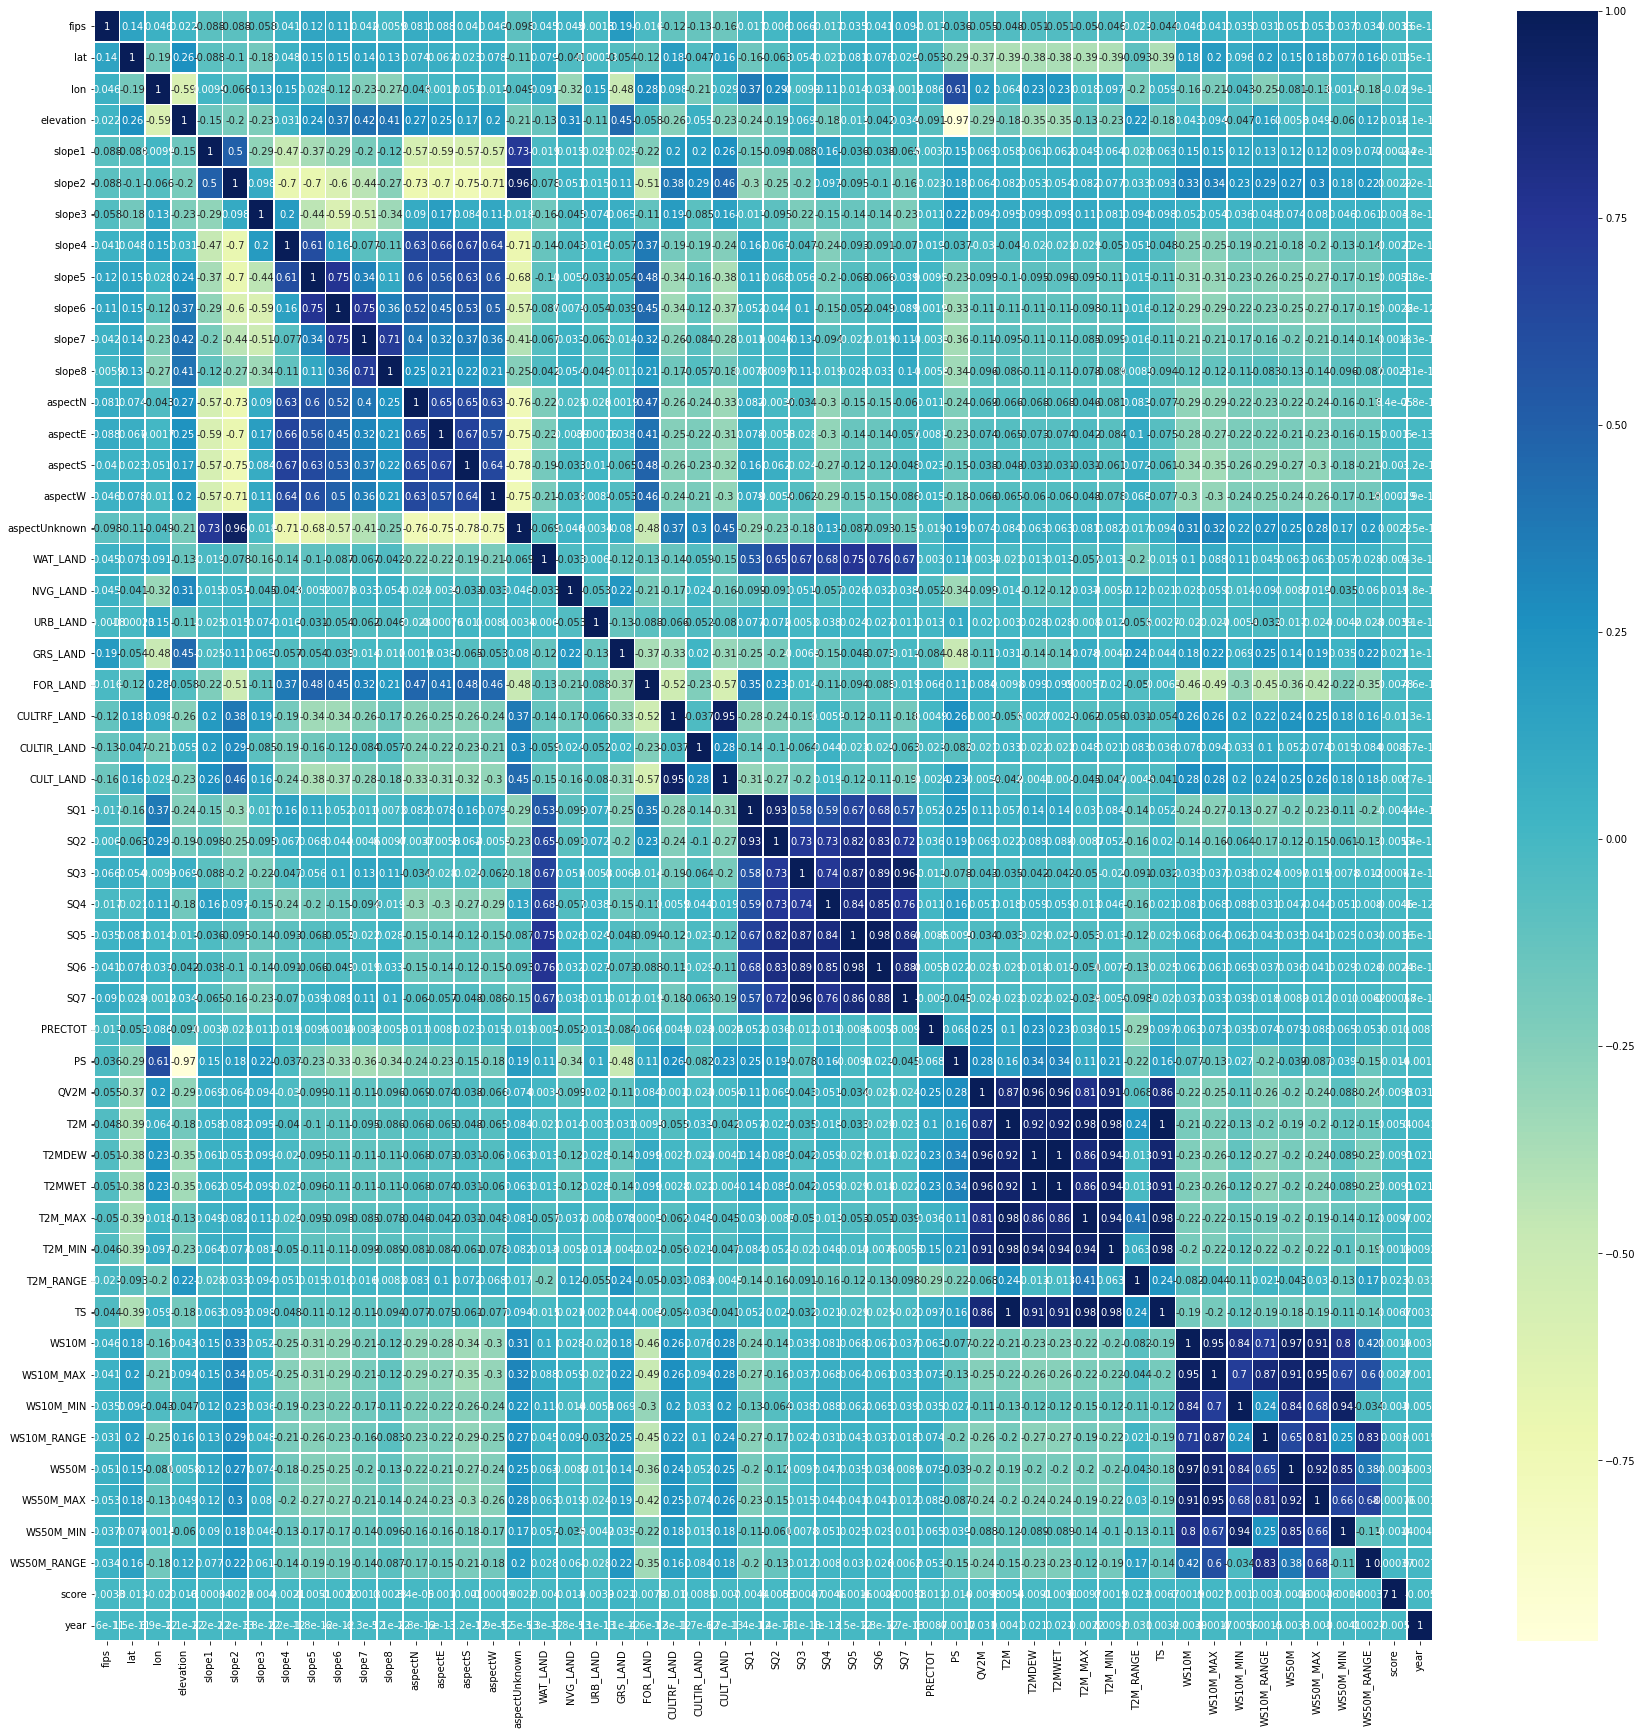

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(fdf_corr, cmap="YlGnBu", annot=True, linewidth = 0.7, ax = ax)